TENSOFLOW PROJETO 2 
- Redes neurais
    



##Definição do problema
- PREVISÃO DE LUCRO
   - Você tem uma máquina de sorvete e deseja criar um modelo para prever as vendas diárias baseado na temperatura 
Vamos construir uma rede neural simples para resolver este problema  
Base de dados:
Input (X): Temperatura externa
Output (Y): Vendas diárias em dólares



##Importar bibliotecas

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
temperature = pd.read_csv('SalesData.csv')
temperature

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [ ]:
temperature.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
temperature.head(6)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744


In [ ]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
temperature.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


 ## Visualização da base de dados

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


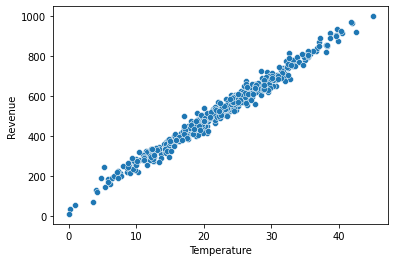

In [ ]:
sns.scatterplot(temperature['Temperature'], temperature['Revenue']);

## Configuração de treinamento

In [ ]:
X_train = temperature['Temperature']
y_train = temperature['Revenue']

In [ ]:
print('y = ',y_train.shape)
print('x = ',X_train.shape)

y =  (500,)
x =  (500,)


## Construção de treinamento de modelo

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))
model.add(tf.keras.layers.Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(0.5), loss = 'mean_squared_error')

In [ ]:
epochs_hist =model.fit(X_train, y_train, epochs= 1000)  # quantas vezes farei esse treinamento

Epoch 1/1000
16/16 [==============================] - 1s 2ms/step - loss: 68535.1250
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 6751.2778
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 1869.5507
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 925.2624
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 682.5274
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 654.4776
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 704.8195
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 754.6090
Epoch 9/1000
16/16 [==============================] - 0s 4ms/step - loss: 645.1830
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 731.6096
Epoch 11/1000
16/16 [==============================] - 0s 1ms/step - loss: 831.2284
Epoch 12/1000
16/16 [==============================] - 0s 1ms/step - loss: 739.22

## Avaliação do modelo

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

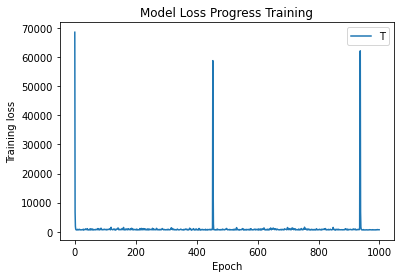

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend('Trainging loss');

In [ ]:
model.get_weights()

[array([[-0.01106136,  4.813484  ,  0.44436896, -0.02024907,  0.05723839,
          0.12632024, -0.03884158,  0.05174956, -0.04917699,  0.11069335]],
       dtype=float32),
 array([ 0.33629695, -2.4110408 ,  4.580329  ,  0.41114828,  1.5426258 ,
        -1.2692447 ,  1.018851  , -1.109755  , -1.679255  , -0.8638945 ],
       dtype=float32),
 array([[-5.7591582e-03],
        [ 4.5477729e+00],
        [-6.0733879e-01],
        [ 1.4920472e-03],
        [-1.1600855e-01],
        [-7.0763260e-02],
        [-7.0766667e-03],
        [-1.7832068e-03],
        [ 1.0133214e-01],
        [-6.9050737e-02]], dtype=float32),
 array([59.83043], dtype=float32)]

In [ ]:
temp= 5
revenue = model.predict([temp])
print('Revenue = ', revenue)

Revenue =  [[153.84135]]


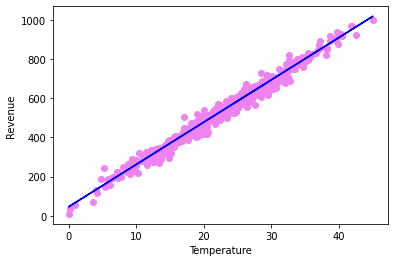

In [ ]:
plt.scatter(X_train, y_train, color= 'violet')
plt.plot(X_train, model.predict(X_train), color= 'blue')
plt.xlabel('Temperature')
plt.ylabel('Revenue ');

## Confirmar os resultados usando sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train = X_train.values.reshape(-1, 1)

In [ ]:
y_train = y_train.values.reshape(-1, 1)

In [ ]:
y_train.shape

(500, 1)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([[21.44362551]])

In [ ]:
regressor.intercept_

array([44.83126709])

Text(0.5, 1.0, 'Revenue Generated vs Temperature')

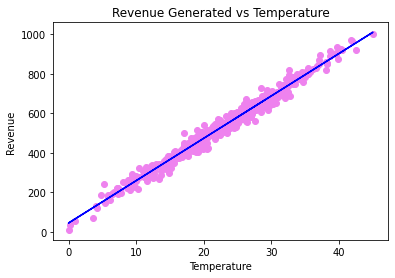

In [ ]:
plt.scatter(X_train, y_train, color= 'violet')
plt.plot(X_train, regressor.predict(X_train), color= 'blue')
plt.xlabel('Temperature')
plt.ylabel('Revenue ');
plt.title('Revenue Generated vs Temperature')

In [ ]:
temp= 5
revenue = regressor.predict([[temp]])
print('Revenue = ', revenue)

Revenue =  [[152.04939464]]


In [ ]:
import pickle
with open('sale_.pkl', 'wb') as file:
    pickle.dump(regressor, file)